Prediction of Google Stock Price using RNNs

In this, I'm predicting the google stock prices in two approaches.

First approach to predict stock prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))


sns.set_style('whitegrid')

params={'legend.fontsize':'x-large',
       'figure.figsize':(20,10),
       'axes.labelsize':'x-large',
       'axes.titlesize':'x-large',
       'xtick.labelsize':'x-large',
       'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

['Google_Stock_Price_Test.csv', 'Google_Stock_Price_Train.csv']


Import the train data

In [2]:
gs_df_train=pd.read_csv('../input/Google_Stock_Price_Train.csv')
print(gs_df_train.shape)
gs_df_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


Normalization of train data

In [3]:
training_set=gs_df_train.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_sc_set=sc.fit_transform(training_set)
training_sc_set

array([[0.89914537],
       [0.90319129],
       [0.90805811],
       ...,
       [0.07934972],
       [0.08360086],
       [0.07619802]])

Split the training set and timestamps is 10.

In [4]:
X_train=[]
y_train=[]
for i in range(10,1258):
    X_train.append(training_sc_set[i-10:i,0])
    y_train.append(training_sc_set[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train.shape,y_train.shape)


(1248, 10) (1248,)


Reshape the X_train to model require format

In [5]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1248, 10, 1)

Import the Keras framework and necessery model libraries

In [6]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras import backend as k

Using TensorFlow backend.


Choose the model

In [7]:
model=Sequential()
model

Training the sequential model

In [8]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(10,1)))
model.add(Dropout(0.2))
#model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.2))
model.add(Flatten(data_format=None))
model.add(Dense(units=1))
model.compile(optimizer='RMSprop',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=50,batch_size=32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1248/1248 [==============================] - 2s 1ms/step - loss: 0.0172
Epoch 2/50
1248/1248 [==============================] - 0s 348us/step - loss: 0.0026
Epoch 3/50
1248/1248 [==============================] - 0s 374us/step - loss: 0.0021
Epoch 4/50
1248/1248 [==============================] - 0s 361us/step - loss: 0.0022
Epoch 5/50
1248/1248 [==============================] - 0s 242us/step - loss: 0.0020
Epoch 6/50
1248/1248 [==============================] - 0s 236us/step - loss: 0.0019
Epoch 7/50
1248/1248 [==============================] - 0s 234us/step - loss: 0.0019
Epoch 8/50
1248/1248 [==============================] - 0s 237us/step - loss: 0.0018
Epoch 9/50
1248/1248 [==============================] - 0s 222us/step - loss: 0.0017
Ep

import the  test dataset for testing the model

In [9]:
gs_df_test=pd.read_csv('../input/Google_Stock_Price_Test.csv')
print(gs_df_test.shape)
gs_df_test.head()

(21, 6)


,Date,Open,High,Low,Close,Volume
0,25-Oct-17,986.27,994.43,977.72,991.46,1395282
1,24-Oct-17,986.50,989.26,977.08,988.49,1445129
2,23-Oct-17,1005.18,1005.79,983.10,985.54,1639294
3,20-Oct-17,1007.05,1008.65,1002.27,1005.07,1606031
4,19-Oct-17,1004.75,1007.32,997.30,1001.84,1714243


Original google stock prices

In [10]:
real_gs_price=gs_df_test.iloc[:,1:2].values
real_gs_price

array([[ 986.27],
       [ 986.5 ],
       [1005.18],
       [1007.05],
       [1004.75],
       [1011.05],
       [1007.44],
       [1009.63],
       [1009.11],
       [1003.84],
       [ 989.04],
       [ 995.3 ],
       [ 995.  ],
       [ 980.  ],
       [ 972.79],
       [ 971.76],
       [ 967.56],
       [ 975.65],
       [ 966.  ],
       [ 956.25],
       [ 942.74]])

Finding the total google stock by concating the google stock train and google stock test. 

In [11]:
gs_df_total=pd.concat([gs_df_train['Open'],gs_df_test['Open']],axis=0)
print(gs_df_total.shape)
gs_df_total.head()

(1279,)


0    936.69
1    939.45
2    942.77
3    948.13
4    937.73
Name: Open, dtype: float64

Test input for testing the model

In [12]:
test_input=gs_df_total[len(gs_df_total)-len(gs_df_test)-10:].values
test_input

array([ 380.22,  380.88,  385.74,  381.76,  378.24,  382.98,  379.9 ,
        377.45,  380.35,  375.3 ,  986.27,  986.5 , 1005.18, 1007.05,
       1004.75, 1011.05, 1007.44, 1009.63, 1009.11, 1003.84,  989.04,
        995.3 ,  995.  ,  980.  ,  972.79,  971.76,  967.56,  975.65,
        966.  ,  956.25,  942.74])

Reshape the test input

In [13]:
test_input=test_input.reshape(-1,1)
print(test_input.shape)
test_input

(31, 1)


array([[ 380.22],
       [ 380.88],
       [ 385.74],
       [ 381.76],
       [ 378.24],
       [ 382.98],
       [ 379.9 ],
       [ 377.45],
       [ 380.35],
       [ 375.3 ],
       [ 986.27],
       [ 986.5 ],
       [1005.18],
       [1007.05],
       [1004.75],
       [1011.05],
       [1007.44],
       [1009.63],
       [1009.11],
       [1003.84],
       [ 989.04],
       [ 995.3 ],
       [ 995.  ],
       [ 980.  ],
       [ 972.79],
       [ 971.76],
       [ 967.56],
       [ 975.65],
       [ 966.  ],
       [ 956.25],
       [ 942.74]])

Normalization of test input

In [14]:
test_input=sc.transform(test_input)
print(test_input.shape)
test_input

(31, 1)


array([[0.08341029],
       [0.08437779],
       [0.09150212],
       [0.0856678 ],
       [0.08050779],
       [0.08745621],
       [0.0829412 ],
       [0.07934972],
       [0.08360086],
       [0.07619802],
       [0.9718252 ],
       [0.97216236],
       [0.99954557],
       [1.00228682],
       [0.99891523],
       [1.00815046],
       [1.00285853],
       [1.00606887],
       [1.0053066 ],
       [0.99758125],
       [0.97588578],
       [0.98506237],
       [0.9846226 ],
       [0.96263395],
       [0.95206473],
       [0.95055485],
       [0.94439802],
       [0.95625724],
       [0.9421112 ],
       [0.92781858],
       [0.90801413]])

Finding the X_test from test_input

In [15]:
X_test=[]
for i in range(10,31):
    X_test.append(test_input[i-10:i,0])

X_test=np.array(X_test)
print(X_test.shape)
X_test

(21, 10)


array([[0.08341029, 0.08437779, 0.09150212, 0.0856678 , 0.08050779,
        0.08745621, 0.0829412 , 0.07934972, 0.08360086, 0.07619802],
       [0.08437779, 0.09150212, 0.0856678 , 0.08050779, 0.08745621,
        0.0829412 , 0.07934972, 0.08360086, 0.07619802, 0.9718252 ],
       [0.09150212, 0.0856678 , 0.08050779, 0.08745621, 0.0829412 ,
        0.07934972, 0.08360086, 0.07619802, 0.9718252 , 0.97216236],
       [0.0856678 , 0.08050779, 0.08745621, 0.0829412 , 0.07934972,
        0.08360086, 0.07619802, 0.9718252 , 0.97216236, 0.99954557],
       [0.08050779, 0.08745621, 0.0829412 , 0.07934972, 0.08360086,
        0.07619802, 0.9718252 , 0.97216236, 0.99954557, 1.00228682],
       [0.08745621, 0.0829412 , 0.07934972, 0.08360086, 0.07619802,
        0.9718252 , 0.97216236, 0.99954557, 1.00228682, 0.99891523],
       [0.0829412 , 0.07934972, 0.08360086, 0.07619802, 0.9718252 ,
        0.97216236, 0.99954557, 1.00228682, 0.99891523, 1.00815046],
       [0.07934972, 0.08360086, 0.0761980

Reshape the X_test to model require format

In [16]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
X_test

(21, 10, 1)


array([[[0.08341029],
        [0.08437779],
        [0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802]],

       [[0.08437779],
        [0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ]],

       [[0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ],
        [0.97216236]],

       [[0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ],
        [0.97216236],
        [0.99954557]],

       [[0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
  

Predict the google stock 

In [17]:
predicted_gs_price=model.predict(X_test)
predicted_gs_price

array([[0.0792271 ],
       [0.22265425],
       [0.40274447],
       [0.5636809 ],
       [0.6766337 ],
       [0.7432894 ],
       [0.78708315],
       [0.8222256 ],
       [0.86717564],
       [0.9218272 ],
       [0.9783461 ],
       [0.97492826],
       [0.9726101 ],
       [0.9700843 ],
       [0.96494764],
       [0.9582324 ],
       [0.95119834],
       [0.9448529 ],
       [0.9415015 ],
       [0.9373294 ],
       [0.93116933]], dtype=float32)

Determine the predicted google stock prices by using Inverse transformation

In [18]:
predicted_gs_price=sc.inverse_transform(predicted_gs_price)
predicted_gs_price

array([[377.36636],
       [475.20804],
       [598.0602 ],
       [707.8462 ],
       [784.89923],
       [830.3697 ],
       [860.2445 ],
       [884.21765],
       [914.88116],
       [952.1629 ],
       [990.7184 ],
       [988.38684],
       [986.8055 ],
       [985.08246],
       [981.5783 ],
       [976.99744],
       [972.199  ],
       [967.8703 ],
       [965.5841 ],
       [962.73804],
       [958.53577]], dtype=float32)

plot the original and predicted google stock price

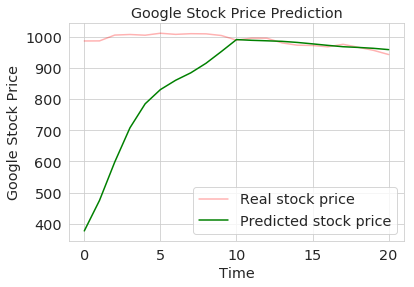

In [19]:
plt.plot(real_gs_price,color='r',alpha=0.3,label='Real stock price')
plt.plot(predicted_gs_price,color='g',label='Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Second approach to predict the stock prices

In [20]:
gs_training_set=gs_df_train.iloc[:,4:5].values
gs_training_set

array([[937.43],
       [934.28],
       [943.26],
       ...,
       [377.63],
       [378.63],
       [377.11]])

Normalization of train_input

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
train_input=scaler.fit_transform(gs_training_set)
print(train_input.shape)
train_input

(1258, 1)


array([[0.90174464],
       [0.89711481],
       [0.91031351],
       ...,
       [0.07895704],
       [0.08042683],
       [0.07819275]])

Split the train_input into gs_X_train and gs_y_train

In [22]:
gs_X_train=[]
gs_y_train=[]
for i in range(10,1258):
    gs_X_train.append(train_input[i-10:i,0])
    gs_y_train.append(train_input[i,0])
gs_X_train,gs_y_train=np.array(gs_X_train),np.array(gs_y_train)
print(gs_X_train.shape,gs_y_train.shape)

(1248, 10) (1248,)


Reshape the gs_X_train to model require format

In [23]:
gs_X_train=np.reshape(gs_X_train,(gs_X_train.shape[0],gs_X_train.shape[1],1))
print(gs_X_train.shape)
gs_X_train

(1248, 10, 1)


array([[[0.90174464],
        [0.89711481],
        [0.91031351],
        ...,
        [0.89859929],
        [0.90571307],
        [0.92086659]],

       [[0.89711481],
        [0.91031351],
        [0.9166189 ],
        ...,
        [0.90571307],
        [0.92086659],
        [0.91529609]],

       [[0.91031351],
        [0.9166189 ],
        [0.9166042 ],
        ...,
        [0.92086659],
        [0.91529609],
        [0.9103576 ]],

       ...,

       [[0.07178447],
        [0.07673766],
        [0.07163749],
        ...,
        [0.08483619],
        [0.08077958],
        [0.08430707]],

       [[0.07673766],
        [0.07163749],
        [0.07129944],
        ...,
        [0.08077958],
        [0.08430707],
        [0.07895704]],

       [[0.07163749],
        [0.07129944],
        [0.08141158],
        ...,
        [0.08430707],
        [0.07895704],
        [0.08042683]]])

Choose the LSTM model

In [24]:
regressor=Sequential()
regressor

Training the LSTM model

In [25]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(10,1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))
regressor.add(Flatten(data_format=None))
regressor.add(Dense(units=1))
regressor.compile(optimizer="RMSprop",loss='mean_squared_error')

regressor.fit(gs_X_train,gs_y_train,epochs=50,batch_size=32)

Epoch 1/50
1248/1248 [==============================] - 1s 853us/step - loss: 0.0150
Epoch 2/50
1248/1248 [==============================] - 0s 274us/step - loss: 0.0027
Epoch 3/50
1248/1248 [==============================] - 0s 281us/step - loss: 0.0025
Epoch 4/50
1248/1248 [==============================] - 0s 283us/step - loss: 0.0023
Epoch 5/50
1248/1248 [==============================] - 0s 280us/step - loss: 0.0022
Epoch 6/50
1248/1248 [==============================] - 0s 282us/step - loss: 0.0018
Epoch 7/50
1248/1248 [==============================] - 0s 285us/step - loss: 0.0018
Epoch 8/50
1248/1248 [==============================] - 0s 277us/step - loss: 0.0018
Epoch 9/50
1248/1248 [==============================] - 0s 277us/step - loss: 0.0018
Epoch 10/50
1248/1248 [==============================] - 0s 282us/step - loss: 0.0016
Epoch 11/50
1248/1248 [==============================] - 0s 279us/step - loss: 0.0018
Epoch 12/50
1248/1248 [==============================] - 0s 281

Testing the model

Original google stock price

In [26]:
real_gstock_price=gs_df_test.iloc[:,4:5].values
print(real_gstock_price.shape)
real_gstock_price

(21, 1)


array([[ 991.46],
       [ 988.49],
       [ 985.54],
       [1005.07],
       [1001.84],
       [1012.74],
       [1011.  ],
       [1009.35],
       [1007.87],
       [1005.65],
       [1005.65],
       [ 987.8 ],
       [ 992.31],
       [ 993.64],
       [ 985.19],
       [ 966.78],
       [ 972.08],
       [ 967.47],
       [ 973.72],
       [ 964.81],
       [ 959.9 ]])

Determine the input_total google stock by concating the google stock train and google stock test.

In [27]:
input_total=pd.concat([gs_df_train['Close'],gs_df_test['Close']],axis=0)
input_total.head()

0    937.43
1    934.28
2    943.26
3    947.55
4    947.54
Name: Close, dtype: float64

Finding the input_test from input_total

In [28]:
input_test=input_total[len(input_total)-len(gs_df_test)-10:].values
print(input_test.shape)
input_test

(31,)


array([ 372.42,  379.3 ,  384.21,  384.41,  381.63,  378.87,  381.27,
        377.63,  378.63,  377.11,  991.46,  988.49,  985.54, 1005.07,
       1001.84, 1012.74, 1011.  , 1009.35, 1007.87, 1005.65, 1005.65,
        987.8 ,  992.31,  993.64,  985.19,  966.78,  972.08,  967.47,
        973.72,  964.81,  959.9 ])

Reshaping the input_test

In [29]:
input_test=input_test.reshape(-1,1)
input_test

array([[ 372.42],
       [ 379.3 ],
       [ 384.21],
       [ 384.41],
       [ 381.63],
       [ 378.87],
       [ 381.27],
       [ 377.63],
       [ 378.63],
       [ 377.11],
       [ 991.46],
       [ 988.49],
       [ 985.54],
       [1005.07],
       [1001.84],
       [1012.74],
       [1011.  ],
       [1009.35],
       [1007.87],
       [1005.65],
       [1005.65],
       [ 987.8 ],
       [ 992.31],
       [ 993.64],
       [ 985.19],
       [ 966.78],
       [ 972.08],
       [ 967.47],
       [ 973.72],
       [ 964.81],
       [ 959.9 ]])

Normaization of input_test

In [30]:
input_test=scaler.transform(input_test)
print(input_test.shape)
input_test

(31, 1)


array([[0.07129944],
       [0.08141158],
       [0.08862825],
       [0.0889222 ],
       [0.08483619],
       [0.08077958],
       [0.08430707],
       [0.07895704],
       [0.08042683],
       [0.07819275],
       [0.98115731],
       [0.97679204],
       [0.97245616],
       [1.00116113],
       [0.99641372],
       [1.01243441],
       [1.00987698],
       [1.00745183],
       [1.00527654],
       [1.00201361],
       [1.00201361],
       [0.97577789],
       [0.98240663],
       [0.98436145],
       [0.97194174],
       [0.94488293],
       [0.95267281],
       [0.94589709],
       [0.95508326],
       [0.94198745],
       [0.93477079]])

Setting the X_test

In [31]:
gs_X_test=[]
for i in range(10,31):
    gs_X_test.append(input_test[i-10:i,0])
gs_X_test=np.array(gs_X_test)
print(gs_X_test.shape)
gs_X_test

(21, 10)


array([[0.07129944, 0.08141158, 0.08862825, 0.0889222 , 0.08483619,
        0.08077958, 0.08430707, 0.07895704, 0.08042683, 0.07819275],
       [0.08141158, 0.08862825, 0.0889222 , 0.08483619, 0.08077958,
        0.08430707, 0.07895704, 0.08042683, 0.07819275, 0.98115731],
       [0.08862825, 0.0889222 , 0.08483619, 0.08077958, 0.08430707,
        0.07895704, 0.08042683, 0.07819275, 0.98115731, 0.97679204],
       [0.0889222 , 0.08483619, 0.08077958, 0.08430707, 0.07895704,
        0.08042683, 0.07819275, 0.98115731, 0.97679204, 0.97245616],
       [0.08483619, 0.08077958, 0.08430707, 0.07895704, 0.08042683,
        0.07819275, 0.98115731, 0.97679204, 0.97245616, 1.00116113],
       [0.08077958, 0.08430707, 0.07895704, 0.08042683, 0.07819275,
        0.98115731, 0.97679204, 0.97245616, 1.00116113, 0.99641372],
       [0.08430707, 0.07895704, 0.08042683, 0.07819275, 0.98115731,
        0.97679204, 0.97245616, 1.00116113, 0.99641372, 1.01243441],
       [0.07895704, 0.08042683, 0.0781927

Reshaping the X_test to model require format

In [32]:
gs_X_test=np.reshape(gs_X_test,(gs_X_test.shape[0],gs_X_test.shape[1],1))
print(gs_X_test.shape)
gs_X_test

(21, 10, 1)


array([[[0.07129944],
        [0.08141158],
        [0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275]],

       [[0.08141158],
        [0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731]],

       [[0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731],
        [0.97679204]],

       [[0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731],
        [0.97679204],
        [0.97245616]],

       [[0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
  

Predict the google stock price

In [33]:
predicted_gstock_price=regressor.predict(gs_X_test)
predicted_gstock_price

array([[0.0831104 ],
       [0.3016489 ],
       [0.5737884 ],
       [0.7501558 ],
       [0.8472149 ],
       [0.86794853],
       [0.8748988 ],
       [0.8787496 ],
       [0.89941514],
       [0.93974227],
       [1.0186641 ],
       [1.0169691 ],
       [1.0105064 ],
       [1.006678  ],
       [1.0041817 ],
       [1.0016632 ],
       [0.9916527 ],
       [0.98299694],
       [0.9768244 ],
       [0.974752  ],
       [0.9722369 ]], dtype=float32)

predict the google stock prices by using inverse transformation

In [34]:
predicted_gstock_price=scaler.inverse_transform(predicted_gstock_price)
predicted_gstock_price

array([[ 380.45584],
       [ 529.1429 ],
       [ 714.29846],
       [ 834.2935 ],
       [ 900.3296 ],
       [ 914.43616],
       [ 919.1649 ],
       [ 921.7849 ],
       [ 935.8451 ],
       [ 963.2824 ],
       [1016.9785 ],
       [1015.82526],
       [1011.4283 ],
       [1008.82355],
       [1007.1252 ],
       [1005.4116 ],
       [ 998.60077],
       [ 992.7117 ],
       [ 988.512  ],
       [ 987.102  ],
       [ 985.3908 ]], dtype=float32)

plot the original and predicted google stock price

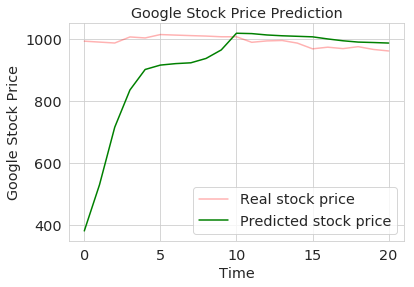

In [35]:
plt.plot(real_gstock_price,color='r',alpha=0.3,label='Real stock price')
plt.plot(predicted_gstock_price,color='g',label='Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

From the two approaches, we can conclude that we are predicting almost similar google stock prices.